# Exploratory Data Analysis
Identifying tree species in Mpala with airborne LiDAR images

In [ ]:
!pip install lasio laspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Mount Google Drive (where data sit)
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# Set Project Folder
import os
header = '/content/drive/My Drive'
hongjin_path = 'classes/2022 fall/CS 288 AI for Social Impact/CS288 Final Project - Tree Species'
derek_path = 'jr/CS288 Final Project - Tree Species'
matt_path = ''

# Select path from above
project_path = os.path.join(header, derek_path)
project_path

'/content/drive/My Drive/jr/CS288 Final Project - Tree Species'

In [ ]:
# Import code utilities files
import sys
sys.path.insert(0, os.path.join(project_path, 'mpala-tree-mapping'))

In [104]:
# import packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from osgeo import gdal
import laspy

## ForestGEO tree labels

In [ ]:
# read data
forestgeo = pd.read_csv(os.path.join(project_path, 'PlotDataReport10-07-2022_1734418034.txt'), delimiter = "\t")
forestgeo.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,No.,Latin,Mnemonic,SubSpecies,Quadrat,PX,PY,TreeID,Tag,StemID,StemTag,Census,DBH,HOM,Date,Codes,Stem,Status
0,1,Acacia brevispica,ACACBR,NaN,221,36.30040,400.50461,124386,20847,254971,020847,1,77.0,0.5,2012-11-20,NaN,main,alive
1,2,Acacia brevispica,ACACBR,NaN,311,51.84520,206.57974,124814,30407,255478,030407,1,37.0,0.5,2012-11-17,NaN,main,alive
2,3,Acacia brevispica,ACACBR,NaN,503,81.23257,58.41180,126361,50086,257294,050086,1,50.0,0.5,2012-11-23,NaN,main,alive
3,4,Acacia brevispica,ACACBR,NaN,10001,1982.57861,9.46110,131025,1000015,262757,1000015,1,23.0,0.5,2014-11-15,M,main,alive
4,5,Acacia brevispica,ACACBR,NaN,10001,1982.57861,9.46110,131025,1000015,262758,1000016,1,23.0,0.5,2014-11-15,NaN,NaN,alive


In [ ]:
# summary stats
print('-- data collection period: ', min(forestgeo['Date']), '-', max(forestgeo['Date']))
print('-- total data points: ', len(forestgeo))
print('-- total trees: ', len(forestgeo[forestgeo['Stem'] == 'main']))
print('-- total # of species: ', len(np.unique(forestgeo['Latin'])))
print('-- distribution of tree species: \n', forestgeo['Latin'].value_counts())

-- data collection period:  2010-02-09 - 2015-04-21
-- total data points:  364068
-- total trees:  136752
-- total # of species:  67
-- distribution of tree species: 
 Croton dichogamous         74880
Acacia brevispica          70835
Euclea divinorum           66000
Acacia drepanolobium       32459
Acacia mellifera           32061
                           ...  
Ormocarpum trachycarpum        2
Acacia senegal                 2
Dodonaea angistifolia          1
Psychotria sp.                 1
Acacia tortilis                1
Name: Latin, Length: 67, dtype: int64


## Airborne LiDAR Images from Davies Lab

In [ ]:
# Data Paths
lidar_path = os.path.join(project_path, 'MpalaForestGEOPlotData', 'data')
high_res_path = os.path.join(lidar_path, 'HighResAcquisitions')

In [ ]:
# count the number of images in each folder
print(os.listdir(lidar_path))
print(os.listdir(os.path.join(lidar_path, 'HighResAcquisitions')))
print('number of images in MpalaForestGEO_CHM_tiledforsegmentation: ', len(os.listdir(os.path.join(lidar_path, 'HighResAcquisitions', 'MpalaForestGEO_CHM_tiledforsegmentation'))))
print('number of images in MpalaForestGEO_LasClippedtoTreePolygons: ', len(os.listdir(os.path.join(lidar_path, 'HighResAcquisitions', 'MpalaForestGEO_LasClippedtoTreePolygons'))))


['LowResAcquisitions', 'HighResAcquisitions']
['MpalaForestGEO_Shapefile050mCanopySegmentation', 'MpalaForestGEO_CHM_tiledforsegmentation', 'MpalaForestGeo_DTM_010m.tif', 'MpalaForestGeo_CHM_010m.tif', 'MpalaForestGEO_LasClippedtoTreePolygons', 'MpalaForestGEO_LasTileswithHeight']
number of images in MpalaForestGEO_CHM_tiledforsegmentation:  41
number of images in MpalaForestGEO_LasClippedtoTreePolygons:  43709


In [ ]:
# display sample images


In [ ]:
# LAS files examples
print(os.listdir(high_res_path))
# print(os.listdir(os.path.join(lidar_path, 'HighResAcquisitions', 'MpalaForestGEO_LasClippedtoTreePolygons')))

las = laspy.read(os.path.join(high_res_path, 'MpalaForestGEO_LasClippedtoTreePolygons', 'treeID_42693.las'))
las2 = laspy.read(os.path.join(high_res_path, 'MpalaForestGEO_LasClippedtoTreePolygons', 'treeID_42694.las'))
print(np.unique(las.classification, return_counts=True), las.header.point_count)
print(np.unique(las2.classification, return_counts=True), las2.header)

list(las.point_format.dimension_names)

['MpalaForestGEO_Shapefile050mCanopySegmentation', 'MpalaForestGEO_CHM_tiledforsegmentation', 'MpalaForestGeo_DTM_010m.tif', 'MpalaForestGeo_CHM_010m.tif', 'MpalaForestGEO_LasClippedtoTreePolygons', 'MpalaForestGEO_LasTileswithHeight']
(array([ 1,  2, 10], dtype=uint8), array([ 909,  611, 1086])) 2606
(array([ 1,  2, 10], dtype=uint8), array([68, 13, 76])) <LasHeader(1.2, <PointFormat(3, 4 bytes of extra dims)>)>


['X',
 'Y',
 'Z',
 'intensity',
 'return_number',
 'number_of_returns',
 'scan_direction_flag',
 'edge_of_flight_line',
 'classification',
 'synthetic',
 'key_point',
 'withheld',
 'scan_angle_rank',
 'user_data',
 'point_source_id',
 'gps_time',
 'red',
 'green',
 'blue',
 'HeightAboveGround']

0.01 0.0 0.01 0.0 0.01 0.0
Example point row : (26282792, 3144811, 179931, 29571, 9, 10, -84, 1, 13, 383177.81679702, 0, 0, 0, 0.00248336)


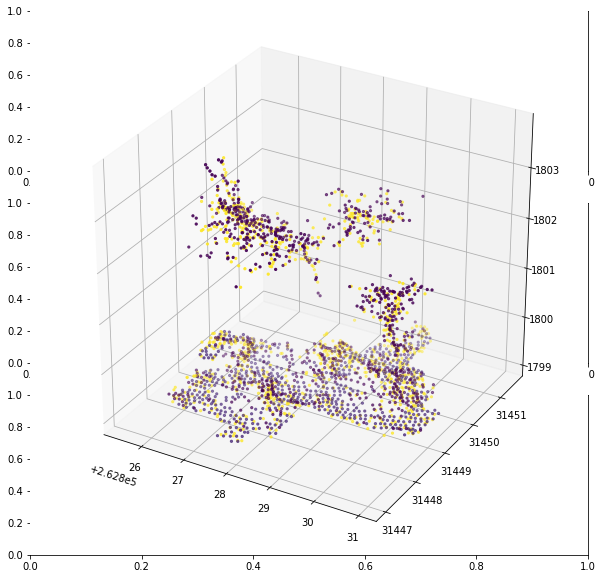

In [216]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# reading las file and copy points
input_las = las
point_records = input_las.points.copy()

# scaling params
las_scaleX = input_las.header.scale[0]
las_offsetX = input_las.header.offset[0]
las_scaleY = input_las.header.scale[1]
las_offsetY = input_las.header.offset[1]
las_scaleZ = input_las.header.scale[2]
las_offsetZ = input_las.header.offset[2]

print(las_scaleX, las_offsetX, las_scaleY, las_offsetY, las_scaleZ, las_offsetZ)

# calculating coordinates
p_X = np.array((point_records['X'] * las_scaleX) + las_offsetX)
p_Y = np.array((point_records['Y'] * las_scaleY) + las_offsetY)
p_Z = np.array((point_records['Z'] * las_scaleZ) + las_offsetZ)
label = np.array(point_records.classification)

print("Example point row :", point_records.array[0])

# plotting points
fig,ax = plt.subplots(3, figsize=(10,10))
ax[0] = fig.add_subplot(111, projection='3d')
ax[0].scatter(p_X, p_Y, p_Z, c=label, marker='.')
plt.show()

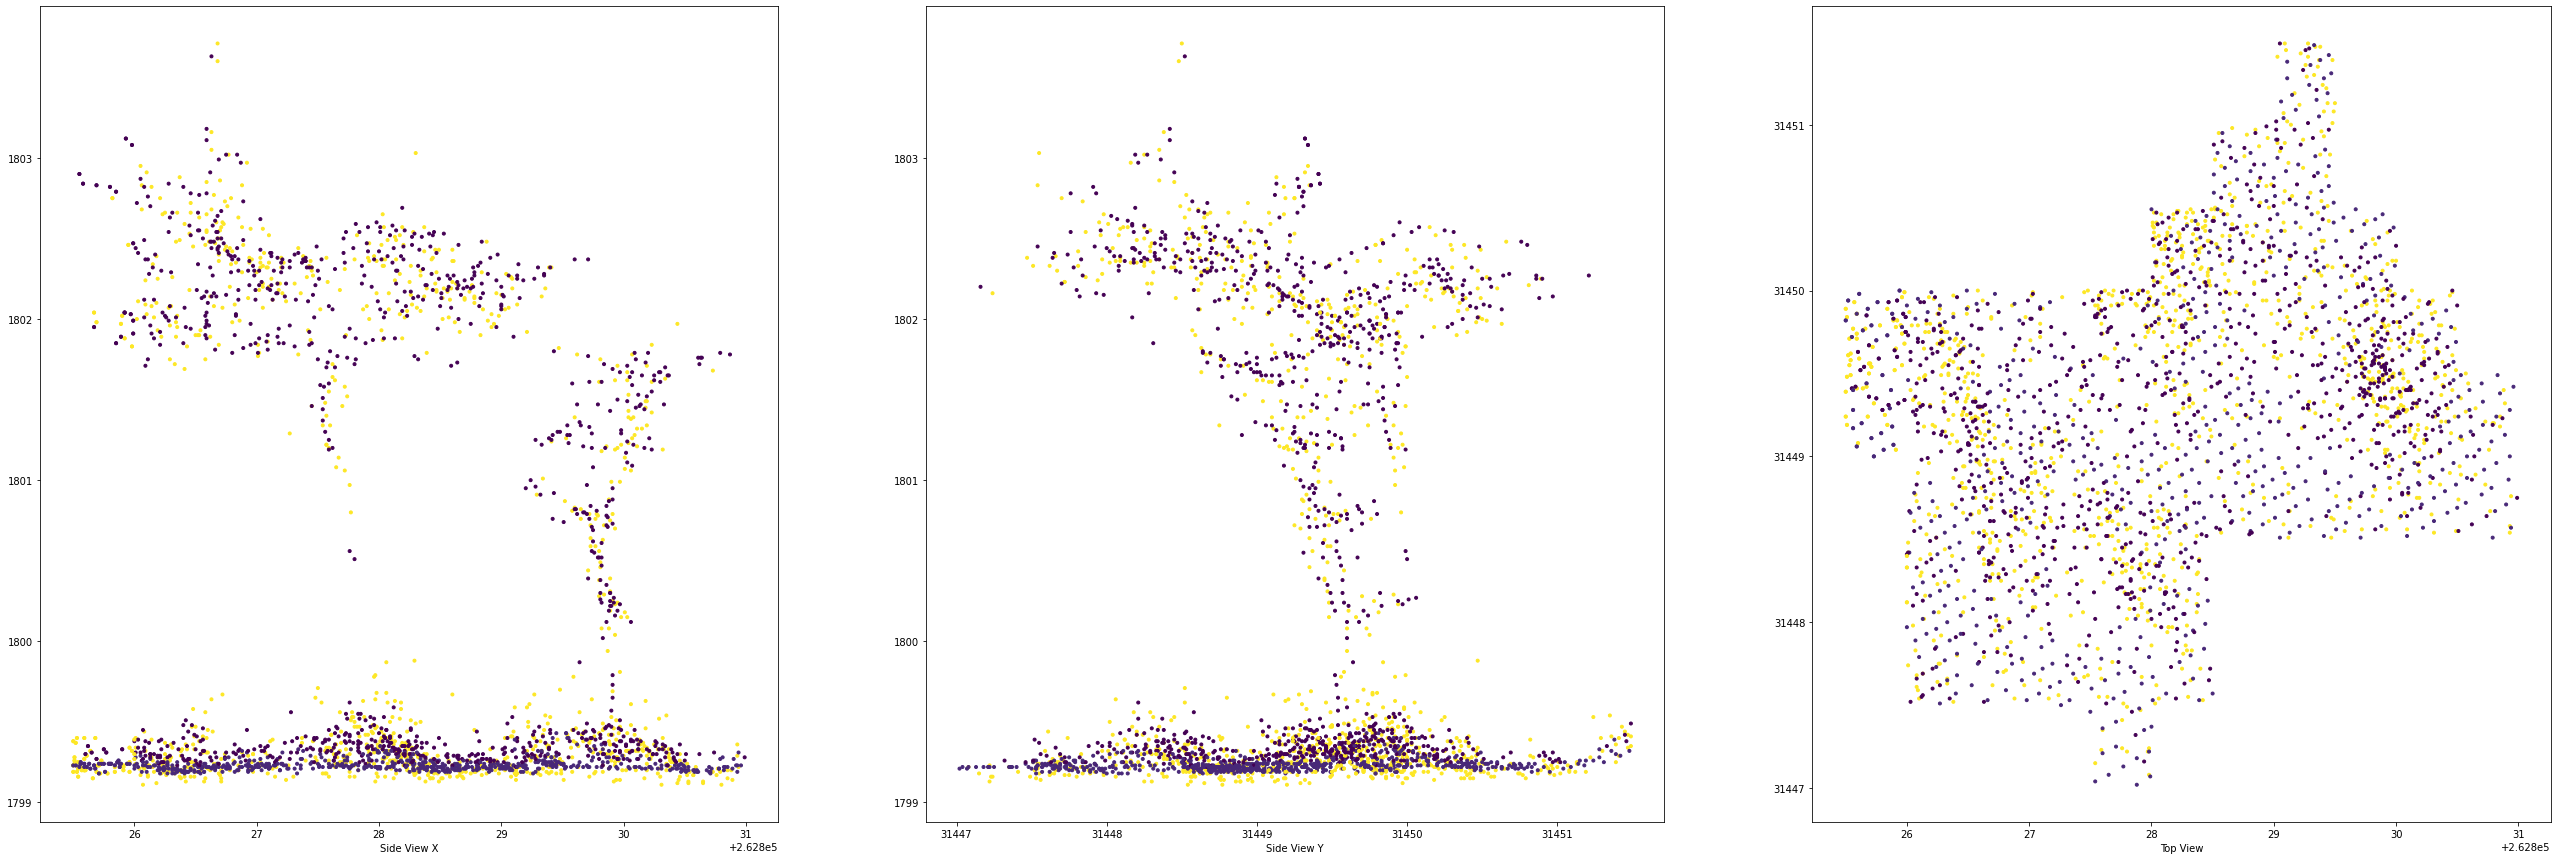

In [223]:
# calculating coordinates
label = np.array(point_records['classification'])

# plotting points
fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(45,15))
# ax = fig.add_subplot(111)
ax0.scatter(p_X, p_Z, c=label, marker='.')
ax0.set_xlabel('Side View X')
ax1.scatter(p_Y, p_Z, c=label, marker='.')
ax1.set_xlabel('Side View Y')
ax2.scatter(p_X, p_Y, c=label, marker='.')
ax2.set_xlabel('Top View')
plt.show()

In [191]:
# About this tree
print(list(las.point_format.dimension_names))
print("Example point row :", point_records.array[0])
print(point_records[0].HeightAboveGround)
print(point_records['classification'][:20])
data = las.points.copy()
ones = []
twos = []
tens = []
for i in data: 
  if i.classification == 1:
    ones.append(i)
  elif i.classification == 2:
    twos.append(i)
  else:
    tens.append(i)
print(len(ones)+ len(twos)+ len(tens))
print(len(data))

['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns', 'scan_direction_flag', 'edge_of_flight_line', 'classification', 'synthetic', 'key_point', 'withheld', 'scan_angle_rank', 'user_data', 'point_source_id', 'gps_time', 'red', 'green', 'blue', 'HeightAboveGround']
Example point row : (26282792, 3144811, 179931, 29571, 9, 10, -84, 1, 13, 383177.81679702, 0, 0, 0, 0.00248336)
0.0024833581
<SubFieldView([10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10])>
2606
2606


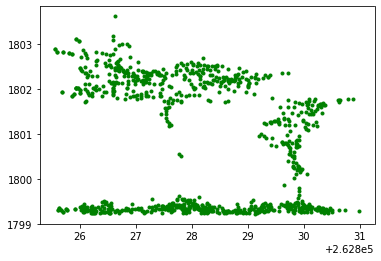

In [229]:
# Filter out for specific class
filter = data.classification == 1
ones_data = data[filter]
p_X = np.array((ones_data['X'] * las_scaleX) + las_offsetX)
p_Y = np.array((ones_data['Y'] * las_scaleY) + las_offsetY)
p_Z = np.array((ones_data['Z'] * las_scaleZ) + las_offsetZ)

# plotting only ones
fig,ax = plt.subplots()
ax.scatter(p_X, p_Z, c='g', marker='.')
plt.show()